In [1]:
import os
import sys
import numpy as np
import time
import pickle
import theano
from theano import tensor as T
from theano.tensor.nnet import conv2d
from theano.tensor.nnet.nnet import sigmoid, softmax, relu, binary_crossentropy, categorical_crossentropy
from theano.tensor.signal.downsample import max_pool_2d
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from collections import OrderedDict
from sklearn.metrics import auc, log_loss, precision_recall_curve, roc_auc_score
from prg.prg import create_prg_curve, calc_auprg
from sklearn.grid_search import ParameterGrid
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import visualizer
%matplotlib inline

Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 82.0% of memory, cuDNN 5005)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are mo

In [2]:
import motif_processor
reload(motif_processor)
processorObj = motif_processor.MotifProcessor()
print(len(processorObj.all_motifs))
print(len(processorObj.motif_names))
motif_tensor, motif_names = processorObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)

2065
2065


In [349]:
import single_layer_model
reload(single_layer_model)  

<module 'single_layer_model' from 'single_layer_model.py'>

In [248]:
CrossValProcObj = single_layer_model.CrossValProcessor()


In [352]:
CvEngineObj=single_layer_model.CvEngine('K562_act', motif_tensor, motif_names, CrossValProcObj.K562_binObj.merged_tensor, CrossValProcObj.K562_binObj.merged_tar, output_dir ="./K562_act/", C = C, debug=False)
CvEngineObj.start_CV_NN(CrossValProcObj.K562_dict, dropout_input = 0.1,L1 = 0.005, L2 = 0.5,dropout_hidden = 0, patience= 40, n_hidden = 2) 
CvEngineObj.summarize(prefix = 'K562_NN_%0.4f'%(L)) 
  

Epoch 00041: early stopping
0.8107	61.0670	0.8114	0.3060	0.7723	0.0000	0.0000	0.0000	143.0000	1134.0000
Completed NN on  chromsome chr1 in 6.1658 seconds
Epoch 00041: early stopping
0.7076	50.0000	0.5000	0.5634	0.0000	0.0000	0.0000	0.0000	82.0000	565.0000
Completed NN on  chromsome chr10 in 12.2796 seconds
Epoch 00061: early stopping
0.7129	65.7904	0.7323	0.2310	0.5326	0.0000	0.0000	0.0000	84.0000	557.0000
Completed NN on  chromsome chr11 in 20.4776 seconds
Epoch 00081: early stopping
0.7083	50.0000	0.5000	0.5577	0.0000	0.0000	0.0000	0.0000	77.0000	590.0000
Completed NN on  chromsome chr12 in 31.0894 seconds
Epoch 00041: early stopping
0.7528	50.0000	0.8045	0.2700	0.7421	3.5714	3.5714	3.5714	28.0000	274.0000
Completed NN on  chromsome chr13 in 38.8639 seconds
Epoch 00041: early stopping
0.7081	50.0000	0.5000	0.5576	0.0000	0.0000	0.0000	0.0000	47.0000	361.0000
Completed NN on  chromsome chr14 in 45.3255 seconds


KeyboardInterrupt: 

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   7.00000000e+00,   1.10000000e+01,
          2.30000000e+01,   3.60000000e+01,   6.80000000e+01,
          4.70300000e+03,   2.21800000e+03,   1.35100000e+03,
          2.91100000e+03,   5.20000000e+02,   1.30000000e+02,
          8.60000000e+01,   3.50000000e+01,   2.00000000e+01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   4.06000000e+02,
          3.13000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

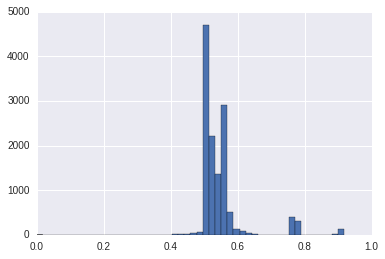

In [260]:
plt.hist(CvEngineObj.resultObj.all_probs, bins = 50)

In [233]:
    L = 1 
    C = 1.0/float(L)
    CvEngineObj=single_layer_model.CvEngine('K562_act', motif_tensor, motif_names, CrossValProcObj.K562_binObj.merged_tensor, CrossValProcObj.K562_binObj.merged_tar, output_dir ="./K562_act/", C = C, debug=False)
    CvEngineObj.start_CV(CrossValProcObj.K562_dict)
    CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'K562_L2_%0.4f'%(L)) 
    CvEngineObj=single_layer_model.CvEngine('HepG2_act', motif_tensor, motif_names, CrossValProcObj.HepG2_binObj.merged_tensor, CrossValProcObj.HepG2_binObj.merged_tar, output_dir ="./HEPG2_act/", C = C, debug=False)
    CvEngineObj.start_CV(CrossValProcObj.HepG2_dict)
    CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'HepG2_L2_%0.4f'%(L)) 
    CvEngineObj=single_layer_model.CvEngine('LCL_act', motif_tensor, motif_names, CrossValProcObj.LCL_binObj.merged_tensor, CrossValProcObj.LCL_binObj.merged_tar, output_dir ="./LCL_act/", C = C, debug=False)
    CvEngineObj.start_CV(CrossValProcObj.LCL_dict)
    CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'LCL_L2_%0.4f'%(L))

Completed chromsome chr1 in 14.3699 seconds
Completed chromsome chr10 in 29.8678 seconds
Completed chromsome chr11 in 45.1086 seconds
Completed chromsome chr12 in 60.5163 seconds
Completed chromsome chr13 in 76.1658 seconds
Completed chromsome chr14 in 91.7208 seconds
Completed chromsome chr15 in 107.2465 seconds
Completed chromsome chr16 in 124.5879 seconds
Completed chromsome chr17 in 140.0343 seconds
Completed chromsome chr18 in 157.0755 seconds
Completed chromsome chr19 in 174.0003 seconds
Completed chromsome chr2 in 188.7750 seconds
Completed chromsome chr20 in 204.8273 seconds
Completed chromsome chr21 in 220.6432 seconds
Completed chromsome chr22 in 238.9923 seconds
Completed chromsome chr3 in 254.0726 seconds
Completed chromsome chr4 in 270.6033 seconds
Completed chromsome chr5 in 285.8156 seconds
Completed chromsome chr6 in 300.7657 seconds
Completed chromsome chr7 in 315.9428 seconds
Completed chromsome chr8 in 331.2890 seconds
Completed chromsome chr9 in 346.6099 seconds
Com

In [234]:
Ls=[1000,100,50,25,5,0.5,0.1,0.01,0.001,0.0001,0]
for L in Ls:
    C = 1.0/float(L)
    CvEngineObj=single_layer_model.CvEngine('K562_act', motif_tensor, motif_names, CrossValProcObj.K562_binObj.merged_tensor, CrossValProcObj.K562_binObj.merged_tar, output_dir ="./K562_act/", C = C, debug=False)
    CvEngineObj.start_CV(CrossValProcObj.K562_dict)
    CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'K562_L2_%0.4f'%(L)) 
    CvEngineObj=single_layer_model.CvEngine('HepG2_act', motif_tensor, motif_names, CrossValProcObj.HepG2_binObj.merged_tensor, CrossValProcObj.HepG2_binObj.merged_tar, output_dir ="./HEPG2_act/", C = C, debug=False)
    CvEngineObj.start_CV(CrossValProcObj.HepG2_dict)
    CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'HepG2_L2_%0.4f'%(L)) 
    CvEngineObj=single_layer_model.CvEngine('LCL_act', motif_tensor, motif_names, CrossValProcObj.LCL_binObj.merged_tensor, CrossValProcObj.LCL_binObj.merged_tar, output_dir ="./LCL_act/", C = C, debug=False)
    CvEngineObj.start_CV(CrossValProcObj.LCL_dict)
    CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'LCL_L2_%0.4f'%(L))

Completed chromsome chr1 in 10.6585 seconds
Completed chromsome chr10 in 19.7140 seconds
Completed chromsome chr11 in 31.5552 seconds
Completed chromsome chr12 in 42.0125 seconds
Completed chromsome chr13 in 50.5844 seconds
Completed chromsome chr14 in 61.7687 seconds
Completed chromsome chr15 in 70.6482 seconds
Completed chromsome chr16 in 86.2303 seconds
Completed chromsome chr17 in 96.0250 seconds
Completed chromsome chr18 in 106.5927 seconds
Completed chromsome chr19 in 122.1861 seconds
Completed chromsome chr2 in 131.4946 seconds
Completed chromsome chr20 in 141.4125 seconds
Completed chromsome chr21 in 150.4488 seconds
Completed chromsome chr22 in 163.0400 seconds
Completed chromsome chr3 in 171.8382 seconds
Completed chromsome chr4 in 181.0513 seconds
Completed chromsome chr5 in 192.7771 seconds
Completed chromsome chr6 in 210.0667 seconds
Completed chromsome chr7 in 220.7616 seconds
Completed chromsome chr8 in 231.7301 seconds
Completed chromsome chr9 in 243.3235 seconds
Comple

KeyboardInterrupt: 

In [219]:
CvEngineObj=single_layer_model.CvEngine('HepG2_act', motif_tensor, motif_names, merged_tensor, merged_tar, output_dir ="./HEPG2_act/", debug=False)

In [215]:
CvEngineObj.start_CV(CrossValProcObj.HepG2_dict)

Completed chromsome chr1 in 13.5539 seconds
Completed chromsome chr10 in 27.7357 seconds
Completed chromsome chr11 in 41.9739 seconds
Completed chromsome chr12 in 56.3277 seconds
Completed chromsome chr13 in 71.0636 seconds
Completed chromsome chr14 in 85.7080 seconds
Completed chromsome chr15 in 100.2609 seconds
Completed chromsome chr16 in 114.6791 seconds
Completed chromsome chr17 in 129.1164 seconds
Completed chromsome chr18 in 145.1068 seconds
Completed chromsome chr19 in 160.7206 seconds
Completed chromsome chr2 in 174.4962 seconds
Completed chromsome chr20 in 188.9801 seconds
Completed chromsome chr21 in 203.8780 seconds
Completed chromsome chr22 in 218.5507 seconds
Completed chromsome chr3 in 232.4910 seconds
Completed chromsome chr4 in 246.7651 seconds
Completed chromsome chr5 in 261.0211 seconds
Completed chromsome chr6 in 274.9401 seconds
Completed chromsome chr7 in 289.2525 seconds
Completed chromsome chr8 in 304.4344 seconds
Completed chromsome chr9 in 319.9832 seconds
Com

In [220]:
CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'L2_0.1')

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [221]:
L = 10 
C = 1.0/float(L)
CvEngineObj=single_layer_model.CvEngine('K562_act', motif_tensor, motif_names, CrossValProcObj.K562_binObj.merged_tensor, CrossValProcObj.K562_binObj.merged_tar, output_dir ="./K562_act/", C = C debug=False)
CvEngineObj.start_CV(CrossValProcObj.K562_dict)
CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'L2_%0.3f'%(L))

Completed chromsome chr1 in 14.5624 seconds
Completed chromsome chr10 in 30.3364 seconds
Completed chromsome chr11 in 47.1870 seconds
Completed chromsome chr12 in 63.1922 seconds
Completed chromsome chr13 in 78.8483 seconds
Completed chromsome chr14 in 94.3449 seconds
Completed chromsome chr15 in 109.8695 seconds
Completed chromsome chr16 in 125.4822 seconds
Completed chromsome chr17 in 140.8916 seconds
Completed chromsome chr18 in 156.5587 seconds
Completed chromsome chr19 in 172.0855 seconds
Completed chromsome chr2 in 186.8818 seconds
Completed chromsome chr20 in 202.4167 seconds
Completed chromsome chr21 in 218.2118 seconds
Completed chromsome chr22 in 234.0882 seconds
Completed chromsome chr3 in 249.9653 seconds
Completed chromsome chr4 in 266.4409 seconds
Completed chromsome chr5 in 281.5882 seconds
Completed chromsome chr6 in 296.5323 seconds
Completed chromsome chr7 in 312.5406 seconds
Completed chromsome chr8 in 327.9978 seconds
Completed chromsome chr9 in 343.4592 seconds
Com

In [222]:
L = 10 
C = 1.0/float(L)
CvEngineObj=single_layer_model.CvEngine('LCL_act', motif_tensor, motif_names, CrossValProcObj.LCL_binObj.merged_tensor, CrossValProcObj.LCL_binObj.merged_tar, output_dir ="./LCL_act/", C = C, debug=False)
CvEngineObj.start_CV(CrossValProcObj.LCL_dict)
CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'L2_%0.3f'%(L))

Completed chromsome chr1 in 23.8912 seconds
Completed chromsome chr10 in 48.4314 seconds
Completed chromsome chr11 in 72.6724 seconds
Completed chromsome chr12 in 97.3003 seconds
Completed chromsome chr13 in 122.8174 seconds
Completed chromsome chr14 in 150.4767 seconds
Completed chromsome chr15 in 175.3595 seconds
Completed chromsome chr16 in 200.1964 seconds
Completed chromsome chr17 in 222.2526 seconds
Completed chromsome chr18 in 247.9266 seconds
Completed chromsome chr19 in 272.6187 seconds
Completed chromsome chr2 in 297.5406 seconds
Completed chromsome chr20 in 323.3413 seconds
Completed chromsome chr21 in 348.8027 seconds
Completed chromsome chr22 in 373.8726 seconds
Completed chromsome chr3 in 401.1107 seconds
Completed chromsome chr4 in 425.5830 seconds
Completed chromsome chr5 in 450.3891 seconds
Completed chromsome chr6 in 474.5860 seconds
Completed chromsome chr7 in 498.9286 seconds
Completed chromsome chr8 in 523.9330 seconds
Completed chromsome chr9 in 549.1667 seconds


ValueError: Found array with 0 sample(s) (shape=(0, 1953)) while a minimum of 1 is required.

In [223]:
CvEngineObj.summarize(dump_indices = True, dump_weights_bias = True, prefix = 'L2_%0.3f'%(L))

In [47]:
X_train = CrossValProcObj.HepG2_dict['chr1']['X_train'] 
X_test = CrossValProcObj.HepG2_dict['chr1']['X_test'] 
Y_train = CrossValProcObj.HepG2_dict['chr1']['Y_train'] 
Y_test = CrossValProcObj.HepG2_dict['chr1']['Y_test']
chrom_indices = CrossValProcObj.HepG2_dict['chr1']['chrom_indices']
other_indices = CrossValProcObj.HepG2_dict['chr1']['other_indices']
merged_tensor = CrossValProcObj.HepG2_binObj.merged_tensor
merged_tar = CrossValProcObj.HepG2_binObj.merged_tar

In [180]:
CvEngineObj.resultObj.weights_df

SIX5_disc1  MYC_disc1  SRF_disc1  AP1_disc1  SIX5_disc2  \
HepG2_act_chr1    -0.009339   0.018330   0.014218   0.050005    0.081883   
HepG2_act_chr10    0.060719   0.029302   0.057977   0.041628    0.082571   
HepG2_act_chr11    0.033119   0.025458   0.029556   0.031867    0.088297   

                 NFY_disc1  ATF3_disc1  NFE2_disc1  NFE2_disc2  BRCA1_disc1  \
HepG2_act_chr1    0.060470    0.012642    0.128641    0.019734    -0.026426   
HepG2_act_chr10   0.054101    0.018993    0.155643    0.028970    -0.039044   
HepG2_act_chr11   0.036188    0.014566    0.164136    0.027953    -0.023400   

                   ...       SOX1_5    SOX3_1    SOX3_2    SOX3_3   TBX20_5  \
HepG2_act_chr1     ...     0.044609 -0.042170  0.047295  0.094701  0.041172   
HepG2_act_chr10    ...     0.009952 -0.045844  0.018607  0.083114  0.070453   
HepG2_act_chr11    ...     0.043147 -0.074060  0.028475  0.069140  0.053581   

                    MSC_1    TFEC_1  CREB3L1_4  HNF4_known26    RARB_4  
HepG2_act_chr1  -0.005220 -0.051855   0.012975      0.005522  0.005151  
HepG2_act_chr10 -0.002356 -0.074542   0.003243      0.013110 -0.005990  
HepG2_act_chr11 -0.008818 -0.065879   0.036965      0.008774 -0.006510  

[3 rows x 1953 columns]

In [131]:
def analyze_weights_df(weight_file):
    pd.read_csv()

14.7816801071
[('Loss', 26.211874231071544), ('Balanced_accuracy', 50.0), ('auROC', 0.76104044757466394), ('auPRC', 0.33889203767606491), ('auPRG', 0.7717014750405583), ('Recall_at_5%_FDR', 0.0), ('Recall_at_10%_FDR', 0.0), ('Recall_at_20%_FDR', 0.0), ('Num_Positives', 162), ('Num_Negatives', 1057)]


In [132]:
start = time.time()
Y_pred, Y_actual = ConvPredObj.LogisticRegPredict(chrom_indices, other_indices, solver = 'lbfgs')
print(time.time() - start)
classObj = single_layer_model.ClassificationResult(Y_actual.flatten(), Y_pred.flatten()) 
result = classObj.binary(Y_actual.astype(bool).flatten(), Y_pred.flatten())
print(result)

1.62758898735
[('Loss', 0.5179489434949317), ('Balanced_accuracy', 67.34614620928086), ('auROC', 0.77266197133746806), ('auPRC', 0.3724786643729483), ('auPRG', 0.79149024680116709), ('Recall_at_5%_FDR', 1.8518518518518516), ('Recall_at_10%_FDR', 1.8518518518518516), ('Recall_at_20%_FDR', 1.8518518518518516), ('Num_Positives', 162), ('Num_Negatives', 1057)]


In [133]:
start = time.time()
Y_preds, Y_actuals = ConvPredObj.LogisticRegCVPredict(chrom_indices, other_indices, solver = 'sag')
print(time.time() - start)
classObj = single_layer_model.ClassificationResult(Y_actuals.flatten(), Y_preds.flatten()) 
result = classObj.binary(Y_actuals.astype(bool).flatten(), Y_preds.flatten())
print(result)

90.5807199478
[('Loss', 0.51253027474515922), ('Balanced_accuracy', 67.440753588656463), ('auROC', 0.77325764742983283), ('auPRC', 0.37090919669765415), ('auPRG', 0.80174088328637538), ('Recall_at_5%_FDR', 0.61728395061728392), ('Recall_at_10%_FDR', 0.61728395061728392), ('Recall_at_20%_FDR', 0.61728395061728392), ('Num_Positives', 162), ('Num_Negatives', 1057)]


In [134]:
start = time.time()
Y_preda, Y_actuala = ConvPredObj.LogisticRegCVPredict(chrom_indices, other_indices, solver = 'lbfgs')
print(time.time() - start)
print(time.time() - start)
classObj = single_layer_model.ClassificationResult(Y_actuala.flatten(), Y_preda.flatten()) 
result = classObj.binary(Y_actuala.astype(bool).flatten(), Y_preda.flatten())
print(result)

30.4663488865
30.4666380882
[('Loss', 0.82755063287412345), ('Balanced_accuracy', 64.874674422135797), ('auROC', 0.73617389069927697), ('auPRC', 0.3294928697694669), ('auPRG', 0.75427551821273497), ('Recall_at_5%_FDR', 0.61728395061728392), ('Recall_at_10%_FDR', 0.61728395061728392), ('Recall_at_20%_FDR', 0.61728395061728392), ('Num_Positives', 162), ('Num_Negatives', 1057)]


In [116]:
classObj = single_layer_model.ClassificationResult(Y_actual.flatten(), Y_pred.flatten())

In [117]:
result = classObj.binary(Y_actual.astype(bool).flatten(), Y_pred.flatten())

In [119]:
print(time.time() - start)
classObj = single_layer_model.ClassificationResult(Y_actuals.flatten(), Y_preds.flatten()) 
result = classObj.binary(Y_actuals.astype(bool).flatten(), Y_preds.flatten())
print(result)

106.351027012
[('Loss', 0.51253027474515922), ('Balanced_accuracy', 67.440753588656463), ('auROC', 0.77325764742983283), ('auPRC', 0.37090919669765415), ('auPRG', 0.80174088328637538), ('Recall_at_5%_FDR', 0.61728395061728392), ('Recall_at_10%_FDR', 0.61728395061728392), ('Recall_at_20%_FDR', 0.61728395061728392), ('Num_Positives', 162), ('Num_Negatives', 1057)]


In [149]:
ConvPredObj.LogisticRegObj.intercept_

array([-0.04005223])

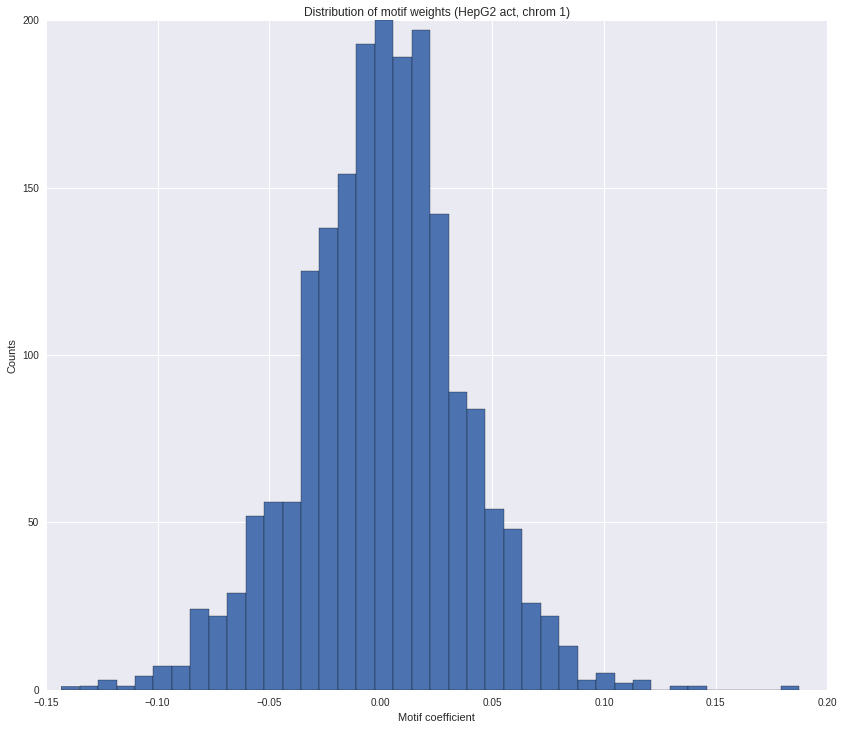

In [88]:
plt.figure(figsize = (14,12))
plt.hist(ConvPredObj.LogisticRegObj.coef_.T.flatten(), bins = 40)
plt.xlabel('Motif coefficient')
plt.ylabel('Counts')
plt.title('Distribution of motif weights (HepG2 act, chrom 1)')

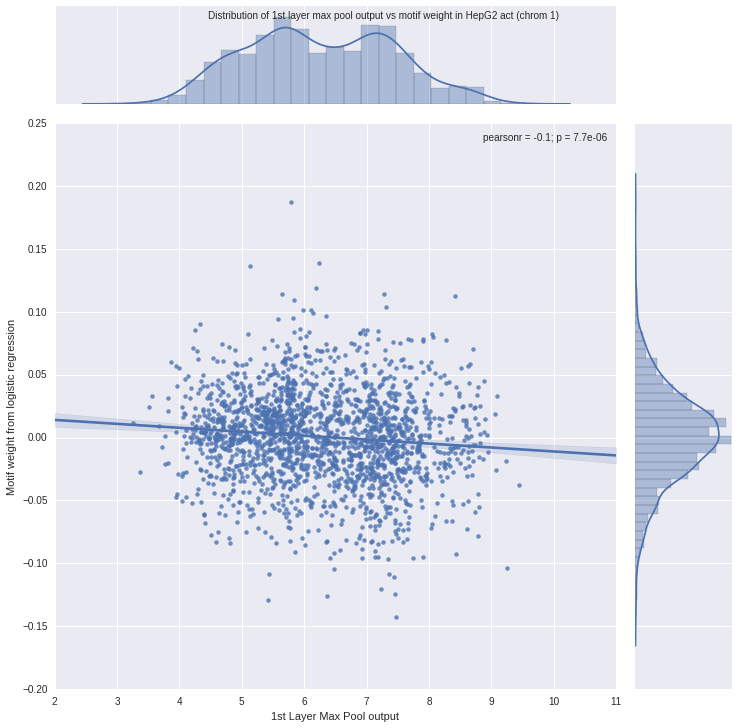

In [90]:
g = sns.jointplot(mean_acts, ConvPredObj.LogisticRegObj.coef_.T.flatten(),  kind="reg", size = 10)
plt.xlabel('1st Layer Max Pool output')
plt.ylabel('Motif weight from logistic regression')
g.fig.suptitle('Distribution of 1st layer max pool output vs motif weight in HepG2 act (chrom 1)')

In [79]:
ConvPredObj.LogisticRegObj.coef_.shape

(1, 1953)

ERROR! Session/line number was not unique in database. History logging moved to new session 193


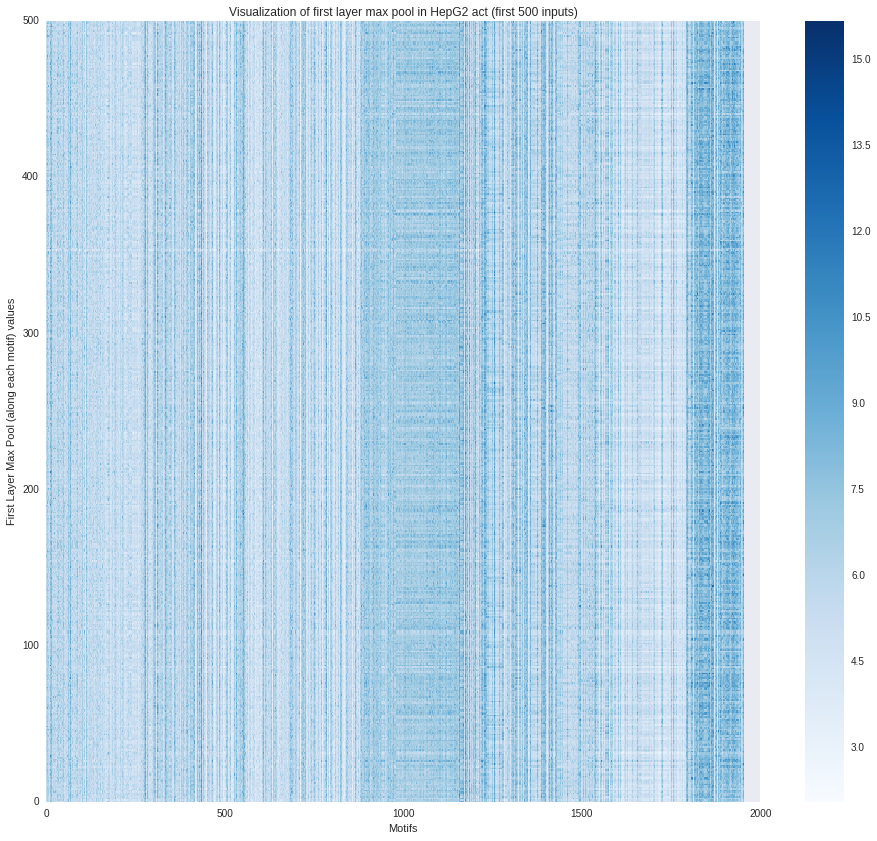

In [50]:
plt.figure(figsize = (16,14))
plt.pcolor(ConvPredObj.X_conv[:500,:], cmap = 'Blues')
plt.colorbar()
plt.xlabel('Motifs')
plt.ylabel('First Layer Max Pool (along each motif) values')
plt.title('Visualization of first layer max pool in HepG2 act (first 500 inputs)')

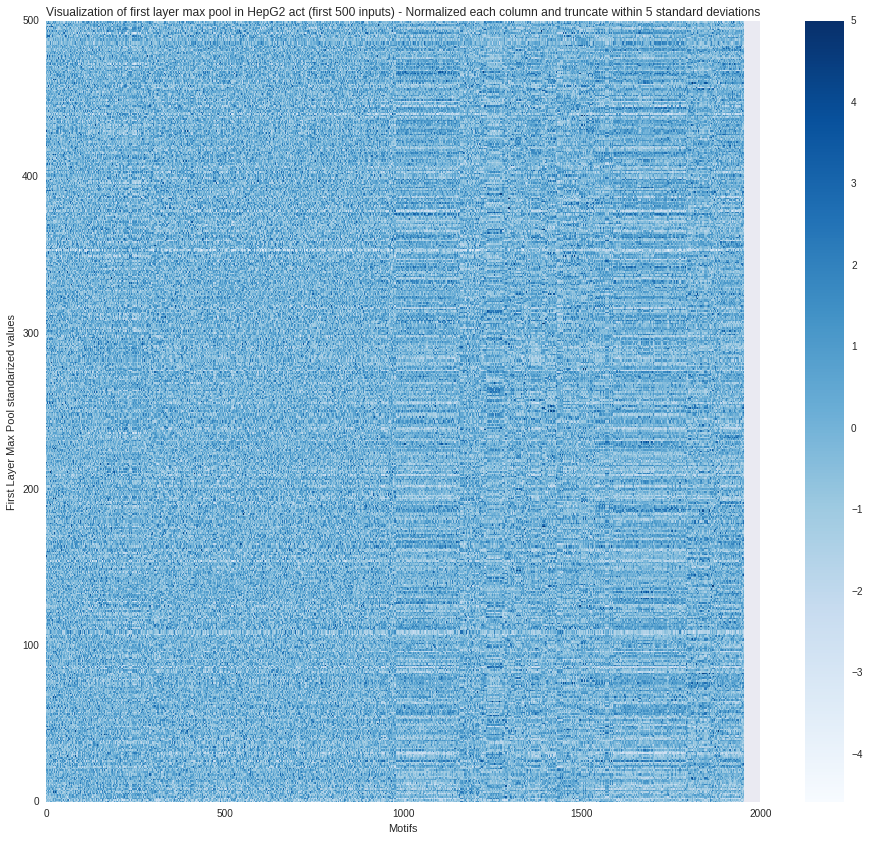

In [52]:
plt.figure(figsize = (16,14))
plt.pcolor(np.clip(scale(ConvPredObj.X_conv[:500,:]), -5, 5), cmap = 'Blues')
plt.colorbar()
plt.xlabel('Motifs')
plt.ylabel('First Layer Max Pool standarized values')
plt.title('Visualization of first layer max pool in HepG2 act (first 500 inputs) - Normalized each column and truncate within 5 standard deviations')

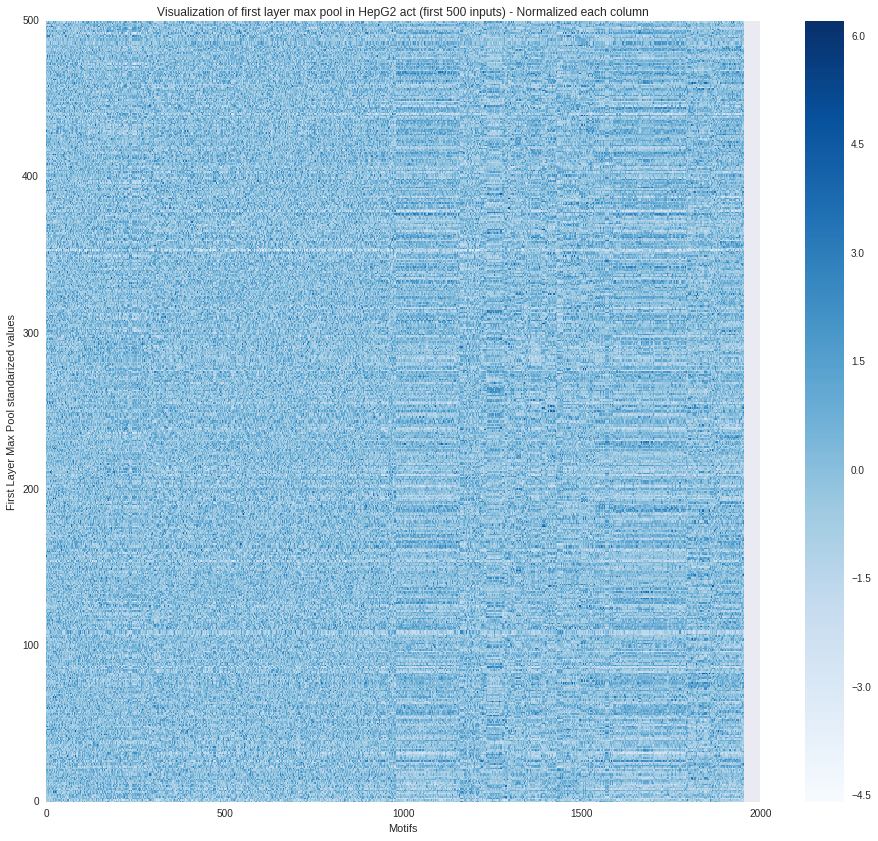

In [53]:
plt.figure(figsize = (16,14))
plt.pcolor(scale(ConvPredObj.X_conv[:500,:]), cmap = 'Blues')
plt.colorbar()
plt.xlabel('Motifs')
plt.ylabel('First Layer Max Pool standarized values')
plt.title('Visualization of first layer max pool in HepG2 act (first 500 inputs) - Normalized each column')

In [56]:
from scipy.stats import entropy
entropies = []
for tensor_idx in range(motif_tensor.shape[0]):
    cur_mat = motif_tensor[tensor_idx, 0, :, :]
    cur_entropies = []
    for i in range(cur_mat.shape[0]):
        cur_entropies.append(entropy(cur_mat[i,:]))
    cur_entropy = np.mean(cur_entropies)
    entropies.append(cur_entropy)
entropies = np.clip(np.asarray(entropies), 0, 1000)

In [146]:
min(entropies)


0.0

In [54]:
mean_acts = np.mean(ConvPredObj.X_conv, axis = 0)
print(mean_acts.shape)

(1953,)


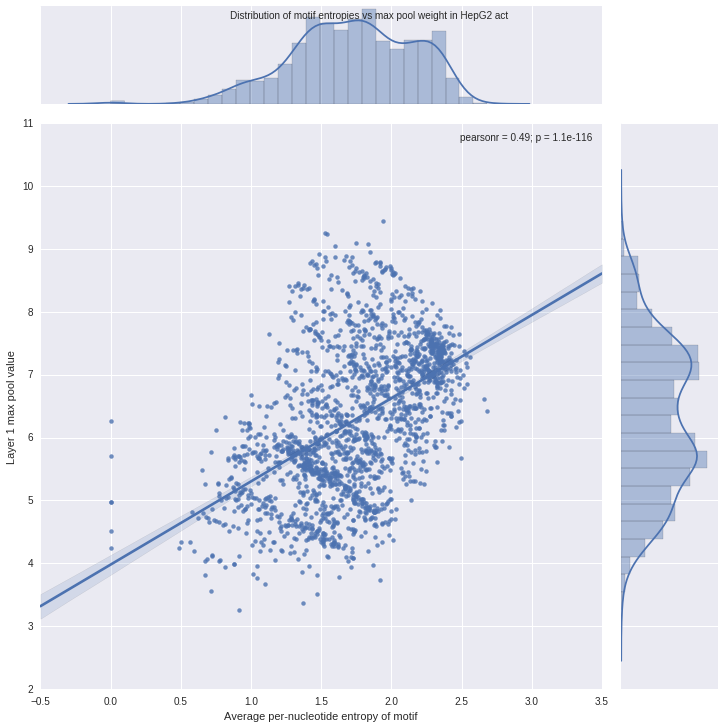

In [57]:
g = sns.jointplot(np.asarray(entropies), mean_acts,  kind="reg", size = 10)
plt.xlabel('Average per-nucleotide entropy of motif')
plt.ylabel('Layer 1 max pool value')
g.fig.suptitle('Distribution of motif entropies vs max pool weight in HepG2 act')

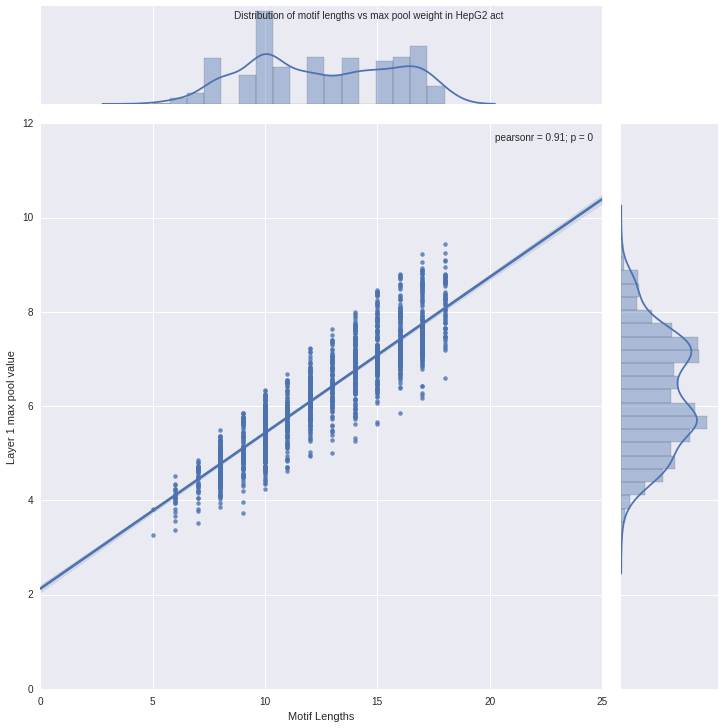

In [58]:
g = sns.jointplot(np.asarray(processorObj.length), mean_acts,  kind="reg", size = 10)
plt.xlabel('Motif Lengths')
plt.ylabel('Layer 1 max pool value')
g.fig.suptitle('Distribution of motif lengths vs max pool weight in HepG2 act')

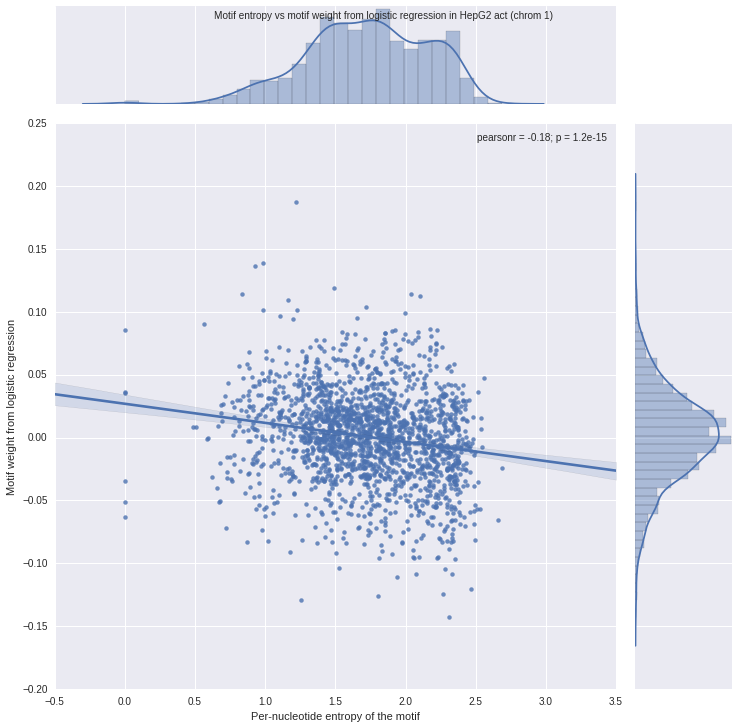

In [93]:
g = sns.jointplot(np.asarray(entropies), ConvPredObj.LogisticRegObj.coef_.T.flatten(),  kind="reg", size = 10)
plt.xlabel('Per-nucleotide entropy of the motif')
plt.ylabel('Motif weight from logistic regression')
g.fig.suptitle('Motif entropy vs motif weight from logistic regression in HepG2 act (chrom 1)')

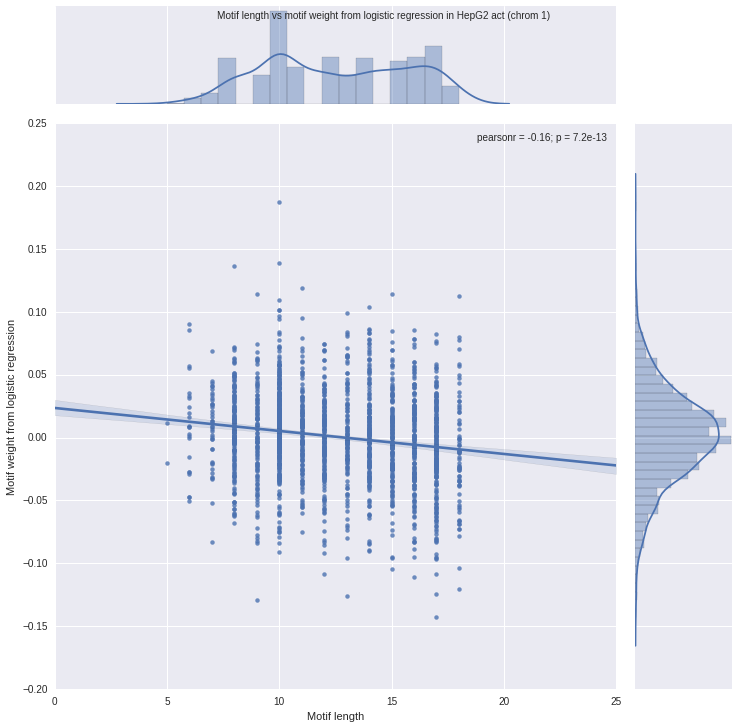

In [94]:
g = sns.jointplot(np.asarray(processorObj.length), ConvPredObj.LogisticRegObj.coef_.T.flatten(),  kind="reg", size = 10)
plt.xlabel('Motif length')
plt.ylabel('Motif weight from logistic regression')
g.fig.suptitle('Motif length vs motif weight from logistic regression in HepG2 act (chrom 1)')

In [172]:
var_series.sort_values(inplace = True)
mean_series.sort_values(inplace = True)

In [173]:
mean_series.head(20)

GATA_known12      3.262526
HNF4_known11      3.365276
EN1_1             3.514849
E2F_known15       3.561764
GATA_known13      3.665116
HOXA3_1           3.726706
HNF4_known10      3.759454
BRCA1_known2      3.772807
KLF12_1           3.814389
PRRX2_2           3.818265
ETS_known8        3.821890
E2F_known6        3.865901
ATF3_known11      3.938053
ZBTB14_2          3.938785
NFIC_4            3.947374
SRY_1             3.954739
ATF3_disc3        3.966065
YY1_known6        3.984276
NFE2L1::MAFG_2    3.994442
AHR::ARNT_3       4.035882
dtype: float64

In [174]:
mean_series.tail(50)

RARG_4           8.585658
RARB_3           8.586292
RARB_4           8.589740
E2F_known24      8.591533
RARA_2           8.601137
ESRRG_1          8.605681
THRB_1           8.616439
ESRRG_2          8.621747
FOXI1_4          8.623446
HIC1_4           8.624938
ETS_known17      8.631377
RARG_9           8.640839
SRF_known1       8.645097
SOX7_3           8.646245
SOX2_5           8.653569
TP63_1           8.660028
RARG_2           8.663477
RARA_6           8.675237
SOX9_5           8.694169
THRA_1           8.698424
SOX3_1           8.699257
RARG_5           8.708440
SOX9_8           8.716680
SOX4_2           8.733808
E2F2_3           8.734183
MGA_2            8.737810
SOX9_6           8.742228
SOX8_5           8.742987
SOX8_2           8.767809
RARB_2           8.777855
SOX10_4          8.778803
E2F_known26      8.782640
E2F2_2           8.792860
RARA_8           8.798032
ZNF713_1         8.803823
SOX9_4           8.809063
SOX9_9           8.822746
RXRA_known6      8.825804
SOX8_9      

In [178]:
import visualizer

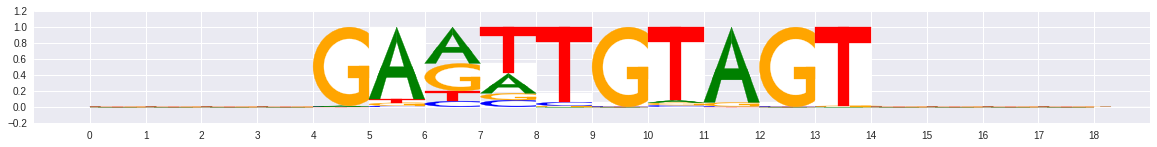

In [180]:
visualizer.plot_weights(motif_tensor[0,0,:,:])